<a href="https://colab.research.google.com/github/laurazanetti98/ibm_project_programming_class/blob/main/ibm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [415]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [416]:
ibm_df = pd.read_csv('IBM.csv')

In [417]:
ibm_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [418]:
ibm_df.tail()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9
1469,34,No,Research & Development,8,3,Medical,2,3,Married,4404,2,4,4


In [419]:
ibm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [420]:
#is there any null value?
ibm_df.isnull().values.any()

False

In [421]:
ibm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


In [422]:
ibm_df[ibm_df['Attrition'] == 'Yes'].count()

Age                        237
Attrition                  237
Department                 237
DistanceFromHome           237
Education                  237
EducationField             237
EnvironmentSatisfaction    237
JobSatisfaction            237
MaritalStatus              237
MonthlyIncome              237
NumCompaniesWorked         237
WorkLifeBalance            237
YearsAtCompany             237
dtype: int64

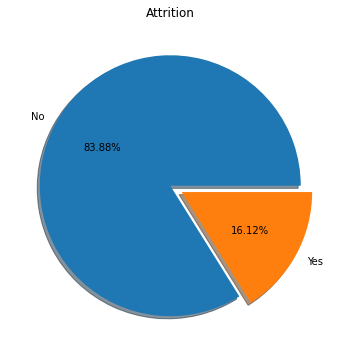

In [423]:
#distribution of Yes and No in Attrition
plt.figure(figsize=(10,6))
my_explode = (0, 0.1)
plt.pie(ibm_df['Attrition'].value_counts(), labels=ibm_df['Attrition'].value_counts().index, shadow=True, autopct='%1.2f%%', explode=my_explode)
plt.title('Attrition')
plt.show()
#is data unbalanced?

In [424]:
#which department we are considering
ibm_df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [425]:
#what are the satisfaction value we are considering
ibm_df['JobSatisfaction'].unique()

array([4, 2, 3, 1])

In [426]:
#which education fields are in the analysis
ibm_df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [427]:
ibm_df.index

RangeIndex(start=0, stop=1470, step=1)

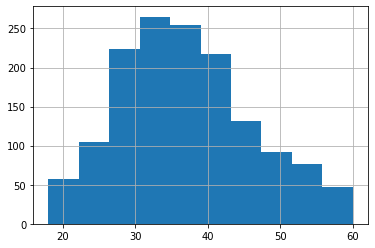

In [428]:
#what is the distribution of Age
ibm_df.Age.hist()

In [429]:
ibm_df['Age'].max()

60

In [430]:
#discretizing Age in 4 classes (number and lenght of the classes are based on the quartiles seen before in the 'description', to have almost 4 classes of the same lenght)
my_labels = ['18_30', '31_36', '37_43', '44_60']
ibm_df['Age'] = pd.cut(ibm_df['Age'], bins=[17, 30, 36,	43, 60], labels=my_labels)

In [431]:
ibm_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,37_43,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,44_60,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37_43,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,31_36,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,18_30,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [432]:
ibm_df['Age'].unique()

['37_43', '44_60', '31_36', '18_30']
Categories (4, object): ['18_30' < '31_36' < '37_43' < '44_60']

In [433]:
ibm_copy = ibm_df.copy()
ibm_copy

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,37_43,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,44_60,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37_43,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,31_36,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,18_30,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,31_36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,37_43,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,18_30,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,44_60,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [434]:
#trasforming Yes and No values to 1 and 0
ibm_df['Attrition'].unique()
ibm_df.Attrition.replace( { 'Yes':1, 'No':0}, inplace=True )
ibm_df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,37_43,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,44_60,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37_43,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,31_36,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,18_30,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,31_36,0,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,37_43,0,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,18_30,0,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,44_60,0,Sales,2,3,Medical,4,2,Married,5390,2,2,9


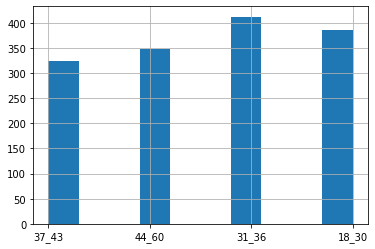

In [435]:
ibm_df.Age.hist()

In [436]:
ibm_df[['Age', 'Attrition']].groupby('Age').mean()
#in average young employees tend to have more attrition

,Attrition
Age,
18_30,0.259067
31_36,0.160194
37_43,0.089231
44_60,0.121037


In [437]:
ibm_df.groupby('MaritalStatus')['Attrition'].count()

MaritalStatus
Divorced    327
Married     673
Single      470
Name: Attrition, dtype: int64

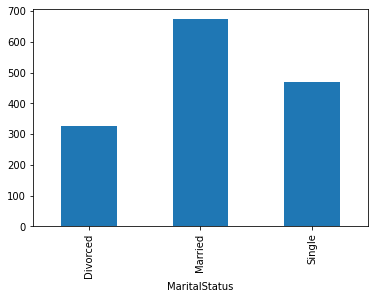

In [438]:
ibm_df.groupby('MaritalStatus')['Attrition'].count().plot.bar()

In [439]:
ibm_df[['MaritalStatus', 'Attrition']].groupby('MaritalStatus').mean()

,Attrition
MaritalStatus,
Divorced,0.100917
Married,0.124814
Single,0.255319


In [440]:
ibm_corr = ibm_df.corr()
ibm_corr

,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Attrition,1.000000,0.077924,-0.031373,-0.103369,-0.103481,-0.159840,0.043494,-0.063939,-0.134392
DistanceFromHome,0.077924,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508
Education,-0.031373,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114
EnvironmentSatisfaction,-0.103369,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458
JobSatisfaction,-0.103481,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803
MonthlyIncome,-0.159840,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285
NumCompaniesWorked,0.043494,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421
WorkLifeBalance,-0.063939,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089
YearsAtCompany,-0.134392,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000


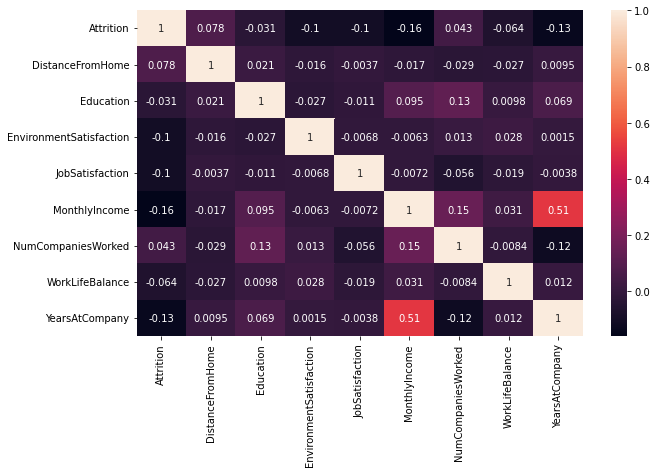

In [441]:
plt.figure(figsize=(10,6))
sns.heatmap(ibm_corr, annot=True)